In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [10]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [11]:
x, y =  make_classification(n_classes=2, class_sep=2, weights=[0.9, 0.1],
                           n_informative=3, n_redundant=1, flip_y=0,
                           n_features=5, n_clusters_per_class=1, n_samples=1000, random_state=42)
print(x)
print(y)

[[ 1.02151869 -0.54816636 -2.07961015  2.98879898 -2.28263692]
 [ 0.21029665  0.37881053 -1.55811557  1.73774953 -2.08380623]
 [ 0.31221893  0.26667276 -0.87350676  2.42279915 -2.37323882]
 ...
 [ 0.76998039 -1.46092494 -3.10382918  1.64883721 -1.67959007]
 [ 1.133483    0.55336357 -3.76108976  1.93915966 -1.64853888]
 [ 0.45798999 -2.66433232 -0.95961047  2.62916078 -2.3866791 ]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0
 0 0 0 0 0 0 0 0

Text(0, 0.5, 'PCA Component 2')

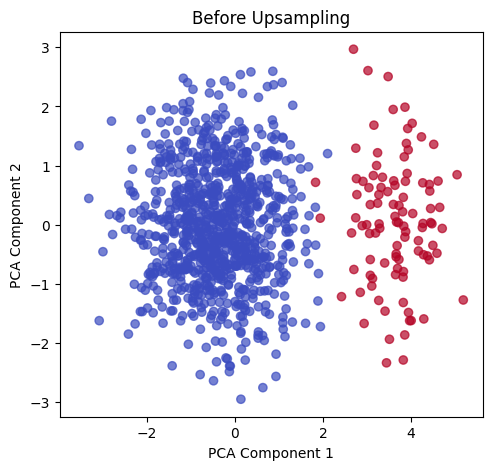

In [12]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', alpha=0.7)
plt.title("Before Upsampling")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")

In [4]:
print("Class distribution before upsampling:", np.bincount(y))

Class distribution before upsampling: [900 100]


In [6]:
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


In [7]:
print("Class distribution after upsampling:", np.bincount(y_resampled))

Class distribution after upsampling: [900 900]


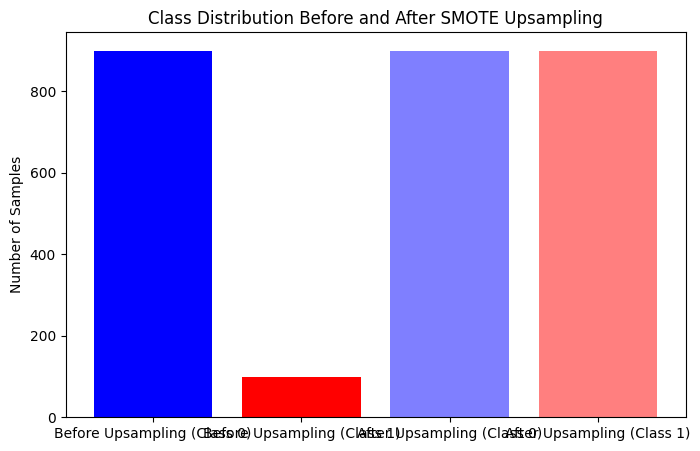

In [8]:
plt.figure(figsize=(8,5))
plt.bar(["Before Upsampling (Class 0)", "Before Upsampling (Class 1)"], np.bincount(y), color=['blue', 'red'])
plt.bar(["After Upsampling (Class 0)", "After Upsampling (Class 1)"], np.bincount(y_resampled), color=['blue', 'red'], alpha=0.5)
plt.ylabel("Number of Samples")
plt.title("Class Distribution Before and After SMOTE Upsampling")
plt.show()

Text(0, 0.5, 'PCA Component 2')

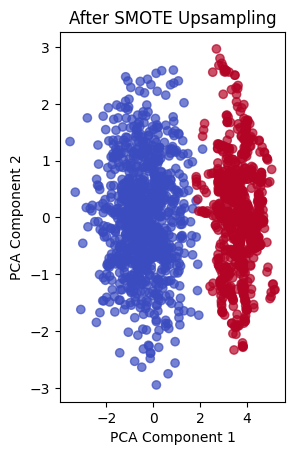

In [13]:
X_resampled_pca = pca.transform(X_resampled)

plt.subplot(1, 2, 2)
plt.scatter(X_resampled_pca[:, 0], X_resampled_pca[:, 1], c=y_resampled, cmap='coolwarm', alpha=0.7)
plt.title("After SMOTE Upsampling")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")

### now the red data points has been increased now there will two cluster now the model will work in two way one red and anather for blue